# Classification Machine Learning
## Ammar Alhoraibi

### Introduction
- The dataset contains cases from a study that was conducted between 1958 and 1970 on the survival of patients who had undergone surgery for breast cancer which contains 4 variables.
- First, the age of the patient at the time of operation. Second, the patient’s year of operation (year -1900,). Then, the number of positive axillary nodes was detected. Last, survival status: 1 = the patient survived 5 years or longer, 2 = the patient died within 5 years

### I.Frame the problem and look at the big picture
- In this lab, we were asked to develop a model to predict the survival status. First of all, we need to frame the problem and understand the situation to choose which model would be used. In this case, the variables that we are working on are numerical and class attributes. 


In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Loading dataset

In [2]:
# path of data 
path = 'a1_data1.csv'
df = pd.read_csv(path)
df.head()

,30,64,1,1.1
0,30.0,62.0,3.0,1
1,30.0,65.0,0.0,1
2,31.0,59.0,2.0,1
3,31.0,65.0,4.0,1
4,33.0,58.0,10.0,1


- Downloading the CSV file on the machine and opening it in Jupyter notebooks using the Pandas library. Displaying the head of the dataset to have a look at the variables and first 5 rows. Also, name the columns as they were unnamed.

In [3]:
df.columns = ['Age', 'year_of_operation', 'num_nodes_detected', 'survival_status']
df.head()

,Age,year_of_operation,num_nodes_detected,survival_status
0,30.0,62.0,3.0,1
1,30.0,65.0,0.0,1
2,31.0,59.0,2.0,1
3,31.0,65.0,4.0,1
4,33.0,58.0,10.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 303 non-null    float64
 1   year_of_operation   304 non-null    float64
 2   num_nodes_detected  303 non-null    float64
 3   survival_status     305 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 9.7 KB


- The function displays information of the dataset. Showing that we have 4 coulmns , 305 rows, as well as the data type of each column.

In [59]:
df.describe()

,Age,year_of_operation,num_nodes_detected,survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.629508,62.836066,4.055738,1.265574
std,10.668315,3.249394,7.194674,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,65.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


- The functions generates descriptive statistics thats summarizethe centeral tendency and many.

In [5]:
df.isna().sum()

Age                   2
year_of_operation     1
num_nodes_detected    2
survival_status       0
dtype: int64

- The finction checks if the dataset contains null values 

In [251]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

df['year_of_operation'] = df['year_of_operation'].fillna(df['year_of_operation'].mean())

df['num_nodes_detected'] = df['num_nodes_detected'].fillna(df['num_nodes_detected'].mean())


df.head(10)

,Age,year_of_operation,num_nodes_detected,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,62,9,2
8,34,58,30,1
9,34,60,1,1


- Here we replace the null vallues with the mean value of each cloumn

In [7]:
df['Age'] = df['Age'].astype('int')
df['year_of_operation'] = df['year_of_operation'].astype('int')
df['num_nodes_detected'] = df['num_nodes_detected'].astype('int')

df.head(3)

,Age,year_of_operation,num_nodes_detected,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1


- Changing the data type of the numerical values from float64 to int64 to remove the unnecessary fractions

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='year_of_operation', ylabel='Age'>,
        <AxesSubplot:xlabel='num_nodes_detected', ylabel='Age'>,
        <AxesSubplot:xlabel='survival_status', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='year_of_operation'>,
        <AxesSubplot:xlabel='year_of_operation', ylabel='year_of_operation'>,
        <AxesSubplot:xlabel='num_nodes_detected', ylabel='year_of_operation'>,
        <AxesSubplot:xlabel='survival_status', ylabel='year_of_operation'>],
       [<AxesSubplot:xlabel='Age', ylabel='num_nodes_detected'>,
        <AxesSubplot:xlabel='year_of_operation', ylabel='num_nodes_detected'>,
        <AxesSubplot:xlabel='num_nodes_detected', ylabel='num_nodes_detected'>,
        <AxesSubplot:xlabel='survival_status', ylabel='num_nodes_detected'>],
       [<AxesSubplot:xlabel='Age', ylabel='survival_status'>,
        <AxesSubplot:xlabel='year_of_operation', ylabel='survival_status'>,
        <AxesSubplot

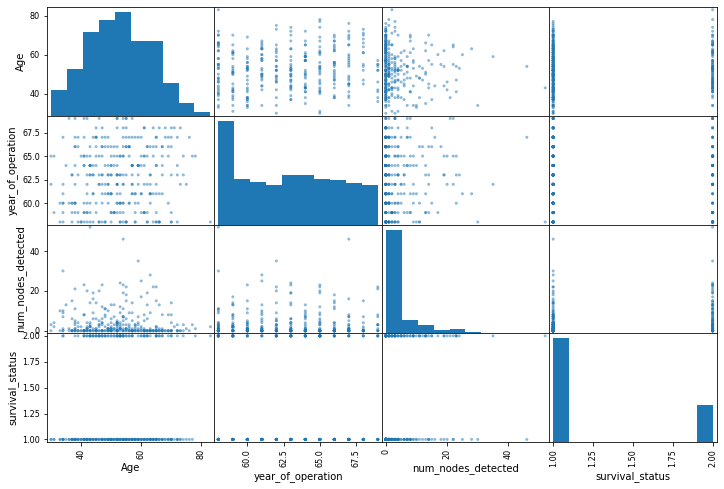

In [8]:
from pandas.plotting import scatter_matrix
attributes=['Age', 'year_of_operation', 'num_nodes_detected', 'survival_status']
scatter_matrix(df[attributes], figsize=(12,8))


In [9]:
corr_matrix = df.corr()
corr_matrix

,Age,year_of_operation,num_nodes_detected,survival_status
Age,1.000000,0.100915,-0.073615,0.059254
year_of_operation,0.100915,1.000000,-0.007065,-0.010805
num_nodes_detected,-0.073615,-0.007065,1.000000,0.284730
survival_status,0.059254,-0.010805,0.284730,1.000000


- The correlation matrix shows that the correlation between the variables there is no linear relation between the attributes and survival status as can be seen it is closer to 0 than 1.

In [10]:
corr_matrix['survival_status'].sort_values(ascending=False)

survival_status       1.000000
num_nodes_detected    0.284730
Age                   0.059254
year_of_operation    -0.010805
Name: survival_status, dtype: float64

<AxesSubplot:xlabel='num_nodes_detected', ylabel='survival_status'>

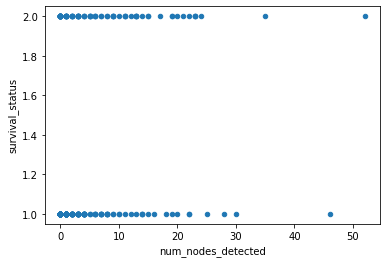

In [11]:
df.plot(kind='scatter', x='num_nodes_detected', y='survival_status')

- The graph shows the variance of the Number of Nodes Detected VS Survival Status

<AxesSubplot:xlabel='Age', ylabel='survival_status'>

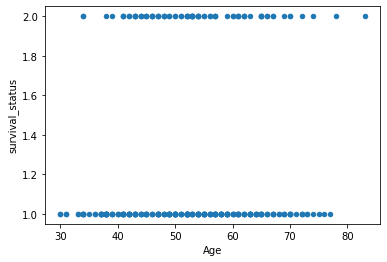

In [12]:
df.plot(kind='scatter', x='Age', y='survival_status')

- The graph shows the variance of the Number of Nodes Detected VS Age

# Prepare the data to make it fit in the machine learining algorithms¶

- Split the dataset into training and test sets

In [14]:
attributes1 = ['num_nodes_detected','Age', 'year_of_operation']
X = df.loc[:, attributes1]
Y = df.loc[:, ['survival_status']]

In [15]:
X.head(3)

,num_nodes_detected,Age,year_of_operation
0,3,30,62
1,0,30,65
2,2,31,59


In [16]:
Y.head(3)

,survival_status
0,1
1,1
2,1


In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=50, train_size = .8)

In [208]:
#reshaping the data
import numpy as np
X_train_arr = np.array(X_train)
Y_train_arr = np.array(Y_train)

- The First step to prepare the data is to Create variables for the dependent column and assign them to x and the independent to y so we can use them separately.
- Then, from sklearn we import the train_test_split to create the x and y training sets and other x and y testing sets. 
- The NumPy library is used here to convert the series to an array.


# Stochastic Gradient Descent

In [209]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train_arr, Y_train_arr.ravel())

SGDClassifier()

In [210]:
y_pred = sgd_clf.predict(X_test) 
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1], dtype=int64)

### Evaluation using Metrics 

In [217]:
from sklearn import metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.7049180327868853
Precision: 0.7241379310344828
Recall: 0.9545454545454546


- The First step to prepare the data is to Create variables for the dependent column and assign them to x and the independent to y so we can use them separately.
- Then, from sklearn we import the train_test_split to create the x and y training sets and other x and y testing sets. 
- The NumPy library is used here to convert the series to an array.


### Evaluation using cross-validation


In [184]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(sgd_clf, X_train_arr, 
              Y_train_arr.ravel(), cv=3, scoring="accuracy")
scores  

array([0.75609756, 0.7654321 , 0.58024691])

### Evaluation using Confusion Matrix

In [268]:
# get predictions for each instance in training set
from sklearn.model_selection import cross_val_predict
y_train_pred0 = cross_val_predict(sgd_clf, X_train_arr, Y_train_arr.ravel(),cv=3)
y_train_pred0

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [270]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_arr.ravel(), y_train_pred0)

array([[176,   4],
       [ 58,   6]], dtype=int64)

### Precision and Recall

In [271]:
print(precision_score(Y_train_arr.ravel(), y_train_pred0))
print(recall_score(Y_train_arr.ravel(), y_train_pred0))

0.7521367521367521
0.9777777777777777


In [272]:
from sklearn.metrics import f1_score
f1_score(Y_train_arr.ravel(), y_train_pred0) 

0.8502415458937197

- After evaluating the model with the Confusion Matrix, we can see the True Positive and True Negative are good and accepted.
- The Confusion Matrix calculates the number of True positive, True negative, False positive and False n,egative predicted values. Based on that we can calculate the accuracy, precision, and recall
- We predict the Y_train, it has better precision and recall than what we got when we predict Y_test which are 75% and 97% respectively
- The f1_score is 85%


# K-Nearest-Neighbor

In [215]:
from sklearn.neighbors import KNeighborsClassifier
knn_cls = KNeighborsClassifier()
knn_cls.fit(X_train_arr, Y_train_arr.ravel())

KNeighborsClassifier()

In [274]:
y_pred_KN = knn_cls.predict(X_test) 
y_pred_KN

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1], dtype=int64)

### Evaluation using Metrics

In [287]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_KN))
print("Precision:",metrics.precision_score(Y_test, y_pred_KN))
print("Recall:",metrics.recall_score(Y_test, y_pred_KN))

Accuracy: 0.6557377049180327
Precision: 0.7346938775510204
Recall: 0.8181818181818182


- K-Nearest-Neighbor model. 
- Its Accuracy is 65%, the Precision is 73%, and the Recall is 81%. Its performance is worse than the SGD model as can be seen the values are lower. 


### Evaluation using cross-validation

In [276]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_cls, X_train_arr, 
              Y_train_arr.ravel(), cv=3, scoring="accuracy")
scores

array([0.7195122 , 0.75308642, 0.7037037 ])

### Evaluation using Confusion Matrix

In [277]:
# get predictions for each instance in training set
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(knn_cls, X_train_arr, Y_train_arr.ravel(),cv=3)
y_train_pred

array([1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       2, 2], dtype=int64)

In [278]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_arr.ravel(), y_train_pred)

array([[159,  21],
       [ 46,  18]], dtype=int64)

### Precision and Recall

In [279]:
print(precision_score(Y_train_arr.ravel(), y_train_pred))
print(recall_score(Y_train_arr.ravel(), y_train_pred))

0.775609756097561
0.8833333333333333


In [280]:
from sklearn.metrics import f1_score
f1_score(Y_train_arr.ravel(), y_train_pred) 

0.8259740259740259

- After evaluating the model with the Confusion Matrix, we can see the True Positive and True Negative are not as good as the SGD model.
- We predict the Y_train, it has better precision and recall than what we got when we predict Y_test as well which are 77% and 88% respectively
- The f1_score is 82%


# Logistic Regression

In [258]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [259]:
lr.fit(X_train_arr, Y_train_arr.ravel())

LogisticRegression()

In [260]:
y_pred_log = lr.predict(X_test)
y_pred_log

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1], dtype=int64)

### Evaluation using Metrics

In [282]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_log))
print("Precision:",metrics.precision_score(Y_test, y_pred_log))
print("Recall:",metrics.recall_score(Y_test, y_pred_log))

Accuracy: 0.7213114754098361
Precision: 0.7647058823529411
Recall: 0.8863636363636364


- Logistic Regression model. 
- Its Accuracy is 72%, the Precision is 76%, and the Recall is 88%. Its performance is worse than the SGD model as can be seen the values are lower. 

### Evaluation using cross-validation

In [261]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train_arr, 
              Y_train_arr.ravel(), cv=3, scoring="accuracy")
scores

array([0.76829268, 0.7654321 , 0.7037037 ])

### Evaluation using Confusion Matrix

In [263]:
# get predictions for each instance in training set
from sklearn.model_selection import cross_val_predict
y_train_pred1 = cross_val_predict(lr, X_train_arr, Y_train_arr.ravel(),cv=3)
y_train_pred1

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 2], dtype=int64)

In [265]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_arr.ravel(), y_train_pred1)

array([[170,  10],
       [ 52,  12]], dtype=int64)

### Precision and Recall

In [266]:
print(precision_score(Y_train_arr.ravel(), y_train_pred1))
print(recall_score(Y_train_arr.ravel(), y_train_pred1))

0.7657657657657657
0.9444444444444444


In [267]:
from sklearn.metrics import f1_score
f1_score(Y_train_arr.ravel(), y_train_pred1)

0.845771144278607

- After evaluating the model with the Confusion Matrix, we can see the True Positive and True Negative are not as good as the SGD model but still better than the KNN.
- We predict the Y_train, it has better precision and recall than what we got when we predict Y_test as well which are 76% and 94% respectively
- The f1_score is 84%


### Conclusion 
- As can be seen, the best model performed on the test set was the SGD model which acquired the highest values of accuracy, precision, and recall at 70%, 72%, and 95% respectively. 
